In [318]:
import pandas as pd

patient_records=pd.read_csv("patients.csv")


In [319]:
soft_tissue_tumours=pd.read_csv("soft_tissue_tumours.csv")
soft_tissue_tumours.subtype=soft_tissue_tumours.subtype.apply(lambda x: x.strip())
soft_tissue_tumours.tumour_type=soft_tissue_tumours.tumour_type.apply(lambda x: x.strip())
patient_records.Diagnosis=patient_records.Diagnosis.apply(lambda x: x.strip())
patient_records.Diagnosis=patient_records.Diagnosis.apply(lambda x: x.lower())

In [320]:
patient_records_merged=patient_records.merge(soft_tissue_tumours, left_on='Diagnosis', right_on='subtype', how="left")

In [321]:
patient_records_merged=patient_records_merged.loc[patient_records_merged["tumour_type"].notna()]

In [322]:
patient_records_merged=patient_records_merged.loc[~patient_records_merged["tumour_type"].isin(["Not identified", "other"])]

In [323]:
patient_records_merged

,Unnamed: 0_x,Age,Diagnosis,Grade,Lab No,Patient,Sex,report_file,Unnamed: 0_y,subtype,tumour_type
0,0,21,nodular fasciitis,NaN,4066 20,746516,F,medical_reports/746516.jpg,16.0,nodular fasciitis,Benign
1,1,59,leiomyosarcoma,2.0,2392 20,741984,M,medical_reports/741984.pdf,26.0,leiomyosarcoma,Malignant
2,2,81,pleomorphic sarcoma,3.0,8150/20,726249,M,medical_reports/726249.jpg,90.0,pleomorphic sarcoma,Malignant
3,3,68,leiomyosarcoma,NaN,8805/20,752384,M,medical_reports/752384.jpg,26.0,leiomyosarcoma,Malignant
4,4,61,schwannoma,NaN,6616/20,742180,F,medical_reports/742180.pdf,50.0,schwannoma,Benign
5,5,58,well-differentiated liposarcoma,1.0,0604/20,736259,F,medical_reports/736259.pdf,2.0,well-differentiated liposarcoma,Intermediate (locally aggressive)
6,6,48,atypical lipomatous tumour,NaN,588/20,737695,F,medical_reports/737695.pdf,1.0,atypical lipomatous tumour,Intermediate (locally aggressive)
7,7,71,leiomyosarcoma,3.0,3384/20,678367,F,medical_reports/678367.jpg,26.0,leiomyosarcoma,Malignant
8,8,65,myofibroblastoma,NaN,3764 20,740278,F,medical_reports/740278.jpg,30.0,myofibroblastoma,Benign
9,9,22,desmoid-type fibromatosis,NaN,6395 20,749189,F,medical_reports/749189.pdf,8.0,desmoid-type fibromatosis,Intermediate (locally aggressive)


In [324]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_histogram(features, filename):
        
        n, bins, patches = plt.hist(x=features, bins='auto',  color='#607c8e', rwidth=0.85)
        plt.grid(axis='y', alpha=0.75)
        plt.xlabel('age')
        plt.ylabel('numner of patients')
        plt.title('')
        plt.text(15, 25, r'$\mu={:.2f}$'.format(np.mean(features)))
        plt.text(15, 18, r'$b={:.2f}$'.format(np.std(features)))
        maxfreq = n.max()

        plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
        plt.savefig(filename)
        plt.grid(axis='y', alpha=0.75)
        plt.show()

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)

def plot_grouped_data(df, group, field, filename, x_title, y_title, title, width):
    
    fig, ax = plt.subplots()
    grouped_data = df.groupby([group]).count().reset_index().sort_values(['Patient'], ascending=True)

    sns.barplot(grouped_data[group],grouped_data[field], palette='Greens_r')

    for i, val in enumerate(grouped_data[field].values):
        plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', 
             fontdict={'fontweight':500, 'size':12})

    change_width(ax, width)
    plt.gca().set_xticklabels(grouped_data[group], rotation=60, horizontalalignment= 'right')
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.savefig(filename, dpi=300)
    plt.show()
    

        

In [325]:
def plot_grouped_data_2(df, group, field, filename, x_title, y_title, title, width):
    
    grouped_data = df.groupby([group]).count().reset_index().sort_values(['Patient'], ascending=True)
    fig, ax = plt.subplots()

    bars = ax.bar(
        x=np.arange(grouped_data[group].shape[0]),
        height=grouped_data[field],
        tick_label=grouped_data[group].values.tolist())

    change_width(ax, width)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)

    bar_color = bars[0].get_facecolor()
    for bar in bars:
          ax.text(
          bar.get_x() + bar.get_width() / 2,
          bar.get_height() + 0.3,
          round(bar.get_height(), 1),
          horizontalalignment='center',
          color=bar_color,
          weight='bold')

    ax.set_xlabel(x_title, labelpad=15, color='#333333')
    ax.set_ylabel(y_title, labelpad=15, color='#333333')

    ax.set_title(title, pad=15, color='#333333', weight='bold')
    plt.xticks(rotation=60)
    fig.tight_layout()
    plt.savefig(filename)

In [326]:
import json
from collections.abc import Iterable

def load_config_file(nfile, abspath=False):

    ext = '.json' if 'json' not in nfile else ''
    pre = '' if abspath else './'
    fp = open(pre + nfile + ext, 'r')

    s = ''

    for l in fp:
        s += l

    return json.loads(s)


def flatten(l):
    for el in l:
        if isinstance(el, Iterable) and not isinstance(el, (str, bytes)):
            yield from flatten(el)
        else:
            yield el


In [327]:

with open('patient_scans.json') as json_file:
    patient_scans = json.load(json_file)
  

In [328]:
slides_per_patient=[len(values) for key,values in patient_scans.items()]

In [329]:
frames=np.vstack((list(patient_scans.keys()),slides_per_patient))

In [330]:
scans_df=pd.DataFrame(np.transpose(frames),columns=["patient","number of scans"])

In [331]:
merged_with_scans=patient_records_merged.merge(scans_df,left_on='Patient', right_on='patient')
merged_with_scans['number of scans']=merged_with_scans['number of scans'].astype('int')

In [332]:
merged_with_scans['number of scans'].mean()
merged_with_scans['number of scans'].std()

4.227009358877184

In [294]:
merged_with_scans

,Unnamed: 0_x,Age,Diagnosis,Grade,Lab No,Patient,Sex,report_file,Unnamed: 0_y,subtype,tumour_type,patient,number of scans
0,0,21,nodular fasciitis,NaN,4066 20,746516,F,medical_reports/746516.jpg,16.0,nodular fasciitis,Benign,746516,5
1,1,59,leiomyosarcoma,2.0,2392 20,741984,M,medical_reports/741984.pdf,26.0,leiomyosarcoma,Malignant,741984,4
2,2,81,pleomorphic sarcoma,3.0,8150/20,726249,M,medical_reports/726249.jpg,90.0,pleomorphic sarcoma,Malignant,726249,3
3,52,81,pleomorphic sarcoma,2.0,6790/20,726249,M,medical_reports/726249.pdf,90.0,pleomorphic sarcoma,Malignant,726249,3
4,3,68,leiomyosarcoma,NaN,8805/20,752384,M,medical_reports/752384.jpg,26.0,leiomyosarcoma,Malignant,752384,1
5,4,61,schwannoma,NaN,6616/20,742180,F,medical_reports/742180.pdf,50.0,schwannoma,Benign,742180,1
6,5,58,well-differentiated liposarcoma,1.0,0604/20,736259,F,medical_reports/736259.pdf,2.0,well-differentiated liposarcoma,Intermediate (locally aggressive),736259,14
7,6,48,atypical lipomatous tumour,NaN,588/20,737695,F,medical_reports/737695.pdf,1.0,atypical lipomatous tumour,Intermediate (locally aggressive),737695,9
8,7,71,leiomyosarcoma,3.0,3384/20,678367,F,medical_reports/678367.jpg,26.0,leiomyosarcoma,Malignant,678367,5
9,8,65,myofibroblastoma,NaN,3764 20,740278,F,medical_reports/740278.jpg,30.0,myofibroblastoma,Benign,740278,6


In [333]:

merged_with_scans.tumour_type=merged_with_scans.tumour_type.apply(lambda x: x.replace("Intermediate (locally aggressive)","Intermediate (locally)"))
merged_with_scans.tumour_type=merged_with_scans.tumour_type.apply(lambda x: x.replace("Intermediate (rarely metastasizing)","Intermediate (rarely)"))


In [334]:
merged_with_scans.to_csv("scan_df.csv")

In [296]:
sum_df = merged_with_scans.groupby(['tumour_type']).agg({ 'number of scans': 'sum'})
sum_df = sum_df.sort_values(['number of scans'], ascending=True)

In [297]:
merged_with_scans


,Unnamed: 0_x,Age,Diagnosis,Grade,Lab No,Patient,Sex,report_file,Unnamed: 0_y,subtype,tumour_type,patient,number of scans
0,0,21,nodular fasciitis,NaN,4066 20,746516,F,medical_reports/746516.jpg,16.0,nodular fasciitis,Benign,746516,5
1,1,59,leiomyosarcoma,2.0,2392 20,741984,M,medical_reports/741984.pdf,26.0,leiomyosarcoma,Malignant,741984,4
2,2,81,pleomorphic sarcoma,3.0,8150/20,726249,M,medical_reports/726249.jpg,90.0,pleomorphic sarcoma,Malignant,726249,3
3,52,81,pleomorphic sarcoma,2.0,6790/20,726249,M,medical_reports/726249.pdf,90.0,pleomorphic sarcoma,Malignant,726249,3
4,3,68,leiomyosarcoma,NaN,8805/20,752384,M,medical_reports/752384.jpg,26.0,leiomyosarcoma,Malignant,752384,1
5,4,61,schwannoma,NaN,6616/20,742180,F,medical_reports/742180.pdf,50.0,schwannoma,Benign,742180,1
6,5,58,well-differentiated liposarcoma,1.0,0604/20,736259,F,medical_reports/736259.pdf,2.0,well-differentiated liposarcoma,Intermediate (locally),736259,14
7,6,48,atypical lipomatous tumour,NaN,588/20,737695,F,medical_reports/737695.pdf,1.0,atypical lipomatous tumour,Intermediate (locally),737695,9
8,7,71,leiomyosarcoma,3.0,3384/20,678367,F,medical_reports/678367.jpg,26.0,leiomyosarcoma,Malignant,678367,5
9,8,65,myofibroblastoma,NaN,3764 20,740278,F,medical_reports/740278.jpg,30.0,myofibroblastoma,Benign,740278,6


In [278]:
# plot_grouped_data(merged_with_scans,
#                   "Sex",
#                    "Patient",
#                   "sex.png",
#                   "biological sex",
#                   "number of patients",
#                   "",
#                   0.25)


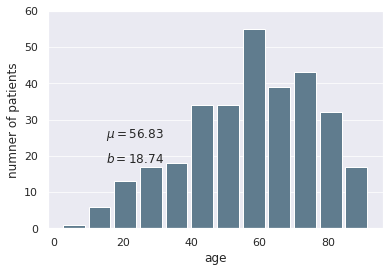

In [314]:

plot_histogram(merged_with_scans["Age"].dropna().values, "age.png")


In [277]:

# plot_grouped_data_2(merged_with_scans,
#                   "tumour_type",
#                   "Patient",
#                   "tumour_types.png",
#                   "tumour type",
#                   "number of patients",
#                   "", 0.35)


In [24]:
grouped_data = merged_with_scans.groupby(["Diagnosis"]).count().reset_index().sort_values(['Patient'], ascending=True)

In [25]:
grouped_data

,Diagnosis,Unnamed: 0_x,Age,Grade,Lab No,Patient,Sex,report_file,Unnamed: 0_y,subtype,tumour_type,patient,number of scans
0,adenoid cystic carcinoma,1,1,0,1,1,1,1,1,1,1,1,1
17,epithelioid hemangioendothelioma,1,1,0,1,1,1,1,1,1,1,1,1
16,epidermoid cyst,1,1,0,1,1,1,1,1,1,1,1,1
15,elastofibroma,1,1,0,1,1,1,1,1,1,1,1,1
40,pleomorphic lipoma,1,1,0,1,1,1,1,1,1,1,1,1
55,tenosynovial giant cell tumour,1,1,0,1,1,1,1,1,1,1,1,1
29,malignant granular cell tumour,1,1,0,1,1,1,1,1,1,1,1,1
9,chordoma,1,1,0,1,1,1,1,1,1,1,1,1
6,atypical lipomatous tumour,1,1,0,1,1,1,1,1,1,1,1,1
5,atypical fibroxanthoma,1,1,0,1,1,1,1,1,1,1,1,1


In [154]:
sum_df = merged_with_scans.groupby(['tumour_type']).agg({ 'number of scans': 'sum'})

In [155]:
sum_df.index.values.tolist()

['Benign', 'Intermediate (locally)', 'Intermediate (rarely)', 'Malignant']

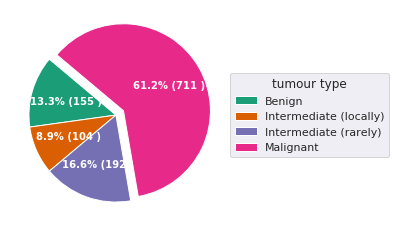

In [226]:
fig, ax = plt.subplots()

data = sum_df['number of scans']
categories = sum_df.index.values.tolist()
explode=[0,0,0,0.1]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,explode=explode
                                 )

# Decoration
ax.legend(wedges, categories, title="tumour type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("")
plt.savefig("pie.png", dpi=300)
plt.show()

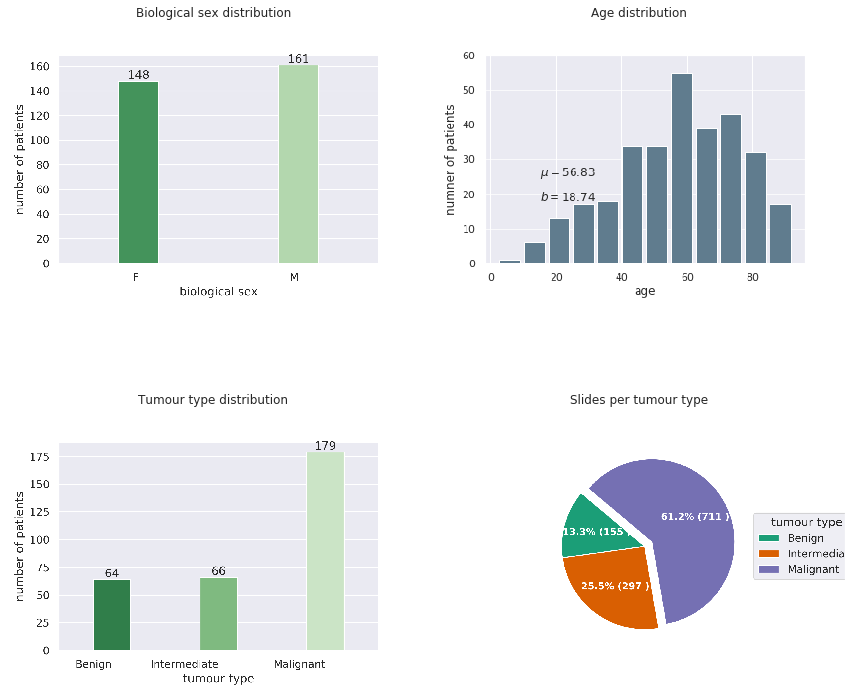

In [28]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
sex = mpimg.imread('sex.png')
age = mpimg.imread('age.png')
tumour_type = mpimg.imread('tumour_types.png')
pie = mpimg.imread('pie.png')
# imgplot = plt.imshow(img)
# plt.show()

f, axarr = plt.subplots(2,2, figsize=(12,12))
axarr[0,0].imshow(sex)
axarr[0,1].imshow(age)
axarr[1,0].imshow(tumour_type)
axarr[1,1].imshow(pie)


axarr[0,0].title.set_text('Biological sex distribution')
axarr[0,1].title.set_text('Age distribution')
axarr[1,0].title.set_text('Tumour type distribution')
axarr[1,1].title.set_text('Slides per tumour type')


axarr[0,0].get_xaxis().set_ticks([])
axarr[0,0].get_yaxis().set_ticks([])
axarr[0,1].get_xaxis().set_ticks([])
axarr[0,1].get_yaxis().set_ticks([])
axarr[1,0].get_xaxis().set_ticks([])
axarr[1,0].get_yaxis().set_ticks([])
axarr[1,1].get_xaxis().set_ticks([])
axarr[1,1].get_yaxis().set_ticks([])
f.tight_layout()
plt.savefig("subplot.png", dpi=300)

plt.show()

In [227]:
sex_count=merged_with_scans.groupby(["Sex","tumour_type"]).count().reset_index().sort_values(['tumour_type'], ascending=True)


In [228]:
merged_with_scans["number of scans"].mean()

3.766990291262136

In [229]:
merged_with_scans.groupby(["tumour_type"]).mean().reset_index()

,tumour_type,Unnamed: 0_x,Age,Grade,Unnamed: 0_y,number of scans
0,Benign,178.906250,50.546875,1.000000,33.671875,2.421875
1,Intermediate (locally),172.090909,53.909091,2.111111,5.424242,3.151515
2,Intermediate (rarely),195.696970,51.333333,2.000000,50.515152,5.848485
3,Malignant,166.340782,60.631285,2.265957,56.715084,3.977654


[28, 36, 21, 12, 11, 22, 88, 91]


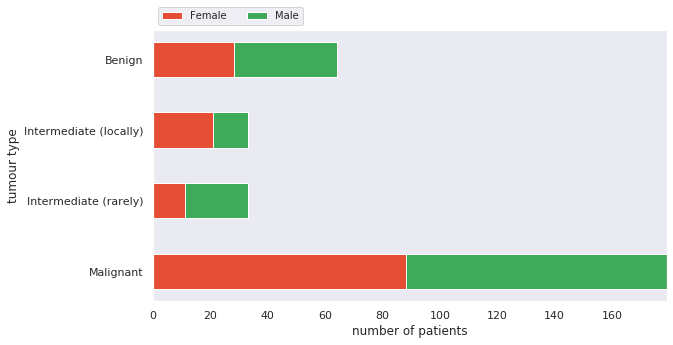

In [335]:

category_names=["Female","Male"]
labels = pd.unique(sex_count["tumour_type"]).tolist()

x = np.arange(0, len(sex_count.index))

category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, len(category_names)))
data = sex_count["Age"].values.tolist()

data=np.reshape(data, (4, 2))
data_cum = np.cumsum(data, axis=1,dtype=float)

fig, ax = plt.subplots(figsize=(9.2, 5))
ax.invert_yaxis()

ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,label=colname, color=color)   
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'

       
ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

plt.xlabel("number of patients")
plt.ylabel("tumour type")
plt.savefig("sex-tumour_type.png")
plt.show()


In [339]:
sex_count=merged_with_scans.groupby(["Sex","tumour_type"]).count().reset_index().sort_values(['Sex'], ascending=True)


In [340]:
sex_count

,Sex,tumour_type,Unnamed: 0_x,Age,Diagnosis,Grade,Lab No,Patient,report_file,Unnamed: 0_y,subtype,patient,number of scans
0,F,Benign,28,28,28,1,27,28,28,28,28,28,28
1,F,Intermediate (locally),21,21,21,4,21,21,21,21,21,21,21
2,F,Intermediate (rarely),11,11,11,0,11,11,11,11,11,11,11
3,F,Malignant,88,88,88,41,88,88,88,88,88,88,88
4,M,Benign,36,36,36,0,36,36,36,36,36,36,36
5,M,Intermediate (locally),12,12,12,5,12,12,12,12,12,12,12
6,M,Intermediate (rarely),22,22,22,2,22,22,22,22,22,22,22
7,M,Malignant,91,91,91,53,91,91,91,91,91,91,91


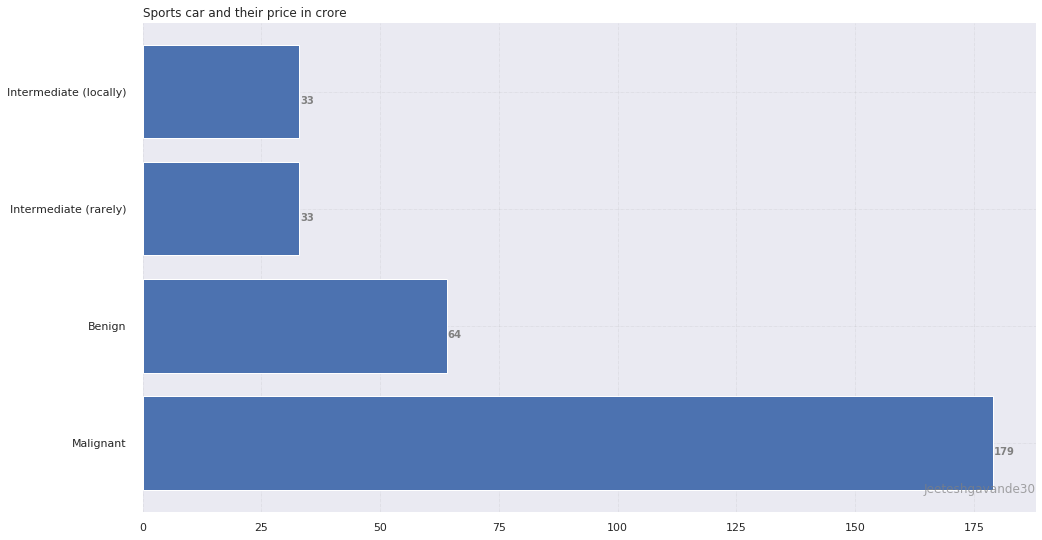

In [301]:
import matplotlib.pyplot as plt

grouped_data = merged_with_scans.groupby(["tumour_type"]).count().reset_index().sort_values(['Patient'], ascending=True)


fig, ax = plt.subplots(figsize =(16, 9))
 

ax.barh(grouped_data["tumour_type"], grouped_data["Patient"])
 

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Sports car and their price in crore',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()